In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import contextily as ctx
import geopandas as gpd
import numpy as np

In [2]:
df = pd.read_csv("data/dataset_airbnb-scraper_2025-11-13_22-13-23-763.csv")

In [3]:
df.head()

,thumbnail,id,title,description,rating,rating/accuracy,rating/checking,rating/cleanliness,rating/communication,rating/guestSatisfaction,...,price/breakDown/total/price,price/breakDown/totalBeforeTaxes,price/discountedPrice,price/label,price/originalPrice,price/price,price/qualifier,coordinates/latitude,coordinates/longitude,url
0,https://a0.muscache.com/im/pictures/miso/Hosti...,704177550111928546,"P""m""P.10: Rooftop Hidden Gem* Incredible City ...",This beautiful loft is located right in the he...,NaN,4.97,4.98,4.96,5.00,4.97,...,$501,NaN,NaN,$502 for 5 nights,NaN,$502,for 5 nights,10.765960,106.699630,https://www.airbnb.com/rooms/70417755011192854...
1,https://a0.muscache.com/im/pictures/hosting/Ho...,1190331169825837907,6.Luxury Big Studio- Infinity Pool/Gym in Center,Brand New project which is located nearby with...,NaN,4.92,4.92,4.81,4.98,4.94,...,$254,NaN,$255,"$255 for 5 nights, originally $289",$289,$255,for 5 nights,10.753201,106.692986,https://www.airbnb.com/rooms/11903311698258379...
2,https://a0.muscache.com/im/pictures/miso/Hosti...,1046815628130412131,Funky Studio M above Craft Coffee by Circadian,"Newly built, launched in Dec 2023!Located in a...",NaN,4.93,4.93,4.91,4.96,4.92,...,$143.24,NaN,$144,"$144 for 5 nights, originally $192",$192,$144,for 5 nights,10.792530,106.700780,https://www.airbnb.com/rooms/10468156281304121...
3,https://a0.muscache.com/im/pictures/miso/Hosti...,1130820184224317486,B11: 1BR City Center - w Balcony,"At this modern and functional studio, you will...",NaN,4.99,4.97,4.96,5.00,4.98,...,$225,NaN,NaN,$225 for 5 nights,NaN,$225,for 5 nights,10.785741,106.699508,https://www.airbnb.com/rooms/11308201842243174...
4,https://a0.muscache.com/im/pictures/miso/Hosti...,1425899556206659577,11:11 Mustang Boutique @BenThanh,Not for Everyone. Only for Those Who Know.Cent...,NaN,4.82,4.82,4.78,4.82,4.86,...,$175.05,NaN,NaN,$176 for 5 nights,NaN,$176,for 5 nights,10.772115,106.693387,https://www.airbnb.com/rooms/14258995562066595...


In [4]:
df.columns

Index(['thumbnail', 'id', 'title', 'description', 'rating', 'rating/accuracy',
       'rating/checking', 'rating/cleanliness', 'rating/communication',
       'rating/guestSatisfaction', 'rating/location', 'rating/reviewsCount',
       'rating/value', 'price/breakDown/basePrice/description',
       'price/breakDown/basePrice/price', 'price/breakDown/cleaningFee',
       'price/breakDown/earlyBirdDiscount',
       'price/breakDown/earlyBirdDiscount/description',
       'price/breakDown/earlyBirdDiscount/price', 'price/breakDown/serviceFee',
       'price/breakDown/specialOffer',
       'price/breakDown/specialOffer/description',
       'price/breakDown/specialOffer/price', 'price/breakDown/taxes',
       'price/breakDown/taxes/description', 'price/breakDown/taxes/price',
       'price/breakDown/total/description', 'price/breakDown/total/price',
       'price/breakDown/totalBeforeTaxes', 'price/discountedPrice',
       'price/label', 'price/originalPrice', 'price/price', 'price/qualifier'

In [5]:
columns_to_keep = ["title", "price/price", "price/label", "coordinates/latitude", "coordinates/longitude"]



In [6]:
df2 = df[columns_to_keep]
df2.head()

,title,price/price,price/label,coordinates/latitude,coordinates/longitude
0,"P""m""P.10: Rooftop Hidden Gem* Incredible City ...",$502,$502 for 5 nights,10.765960,106.699630
1,6.Luxury Big Studio- Infinity Pool/Gym in Center,$255,"$255 for 5 nights, originally $289",10.753201,106.692986
2,Funky Studio M above Craft Coffee by Circadian,$144,"$144 for 5 nights, originally $192",10.792530,106.700780
3,B11: 1BR City Center - w Balcony,$225,$225 for 5 nights,10.785741,106.699508
4,11:11 Mustang Boutique @BenThanh,$176,$176 for 5 nights,10.772115,106.693387


In [15]:
df2 = df2.rename(columns={"price/price": "price", "coordinates/latitude": "lat", "coordinates/longitude": "lon"})
df2.head()
df2 = df2.drop("price/label", axis=1)
df2.head()

,title,price,lat,lon
0,"P""m""P.10: Rooftop Hidden Gem* Incredible City ...",$502,10.765960,106.699630
1,6.Luxury Big Studio- Infinity Pool/Gym in Center,$255,10.753201,106.692986
2,Funky Studio M above Craft Coffee by Circadian,$144,10.792530,106.700780
3,B11: 1BR City Center - w Balcony,$225,10.785741,106.699508
4,11:11 Mustang Boutique @BenThanh,$176,10.772115,106.693387


In [17]:
df2.to_csv("airbnb_hcm.csv")

In [ ]:
df2['price'] = df2['price'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float) # remove the $
df2['price'] = df2['price'] / 5
df2.head()

,title,price,lat,lon
0,"P""m""P.10: Rooftop Hidden Gem* Incredible City ...",100.4,10.765960,106.699630
1,6.Luxury Big Studio- Infinity Pool/Gym in Center,51.0,10.753201,106.692986
2,Funky Studio M above Craft Coffee by Circadian,28.8,10.792530,106.700780
3,B11: 1BR City Center - w Balcony,45.0,10.785741,106.699508
4,11:11 Mustang Boutique @BenThanh,35.2,10.772115,106.693387


In [26]:
df2.columns
df = df2

In [27]:
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df['lon'], df['lat']),
    crs='EPSG:4326'
)

In [41]:
gdf.head()

,title,price,lat,lon,geometry
0,"P""m""P.10: Rooftop Hidden Gem* Incredible City ...",100.4,10.765960,106.699630,POINT (106.69963 10.76596)
1,6.Luxury Big Studio- Infinity Pool/Gym in Center,51.0,10.753201,106.692986,POINT (106.69299 10.7532)
2,Funky Studio M above Craft Coffee by Circadian,28.8,10.792530,106.700780,POINT (106.70078 10.79253)
3,B11: 1BR City Center - w Balcony,45.0,10.785741,106.699508,POINT (106.69951 10.78574)
4,11:11 Mustang Boutique @BenThanh,35.2,10.772115,106.693387,POINT (106.69339 10.77212)


c:\Users\thotc\AppData\Local\Programs\Python\Python313\Lib\site-packages\contextily\tile.py:645: UserWarning: The inferred zoom level of 27 is not valid for the current tile provider (valid zooms: 0 - 19).
  warnings.warn(msg)


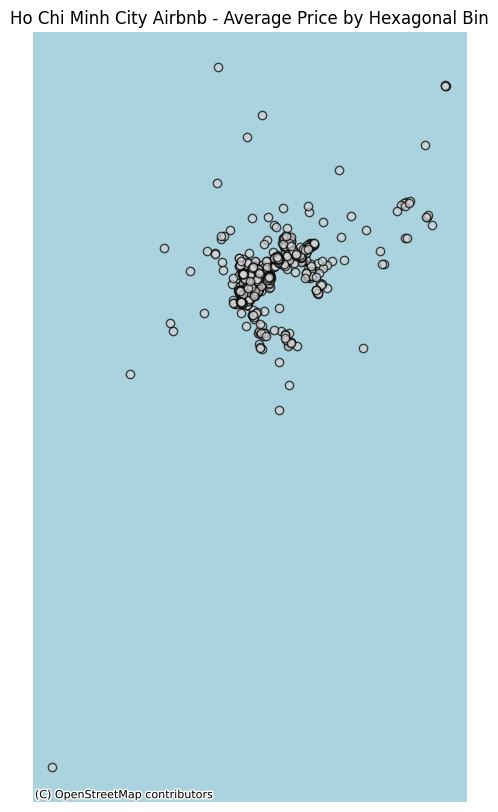

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf.plot( ax=ax, edgecolor='black', facecolor='lightgray', alpha=0.7)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

ax.set_title("Ho Chi Minh City Airbnb - Average Price by Hexagonal Bin")
ax.set_axis_off() # Remove axis labels and ticks for a cleaner map

plt.show()

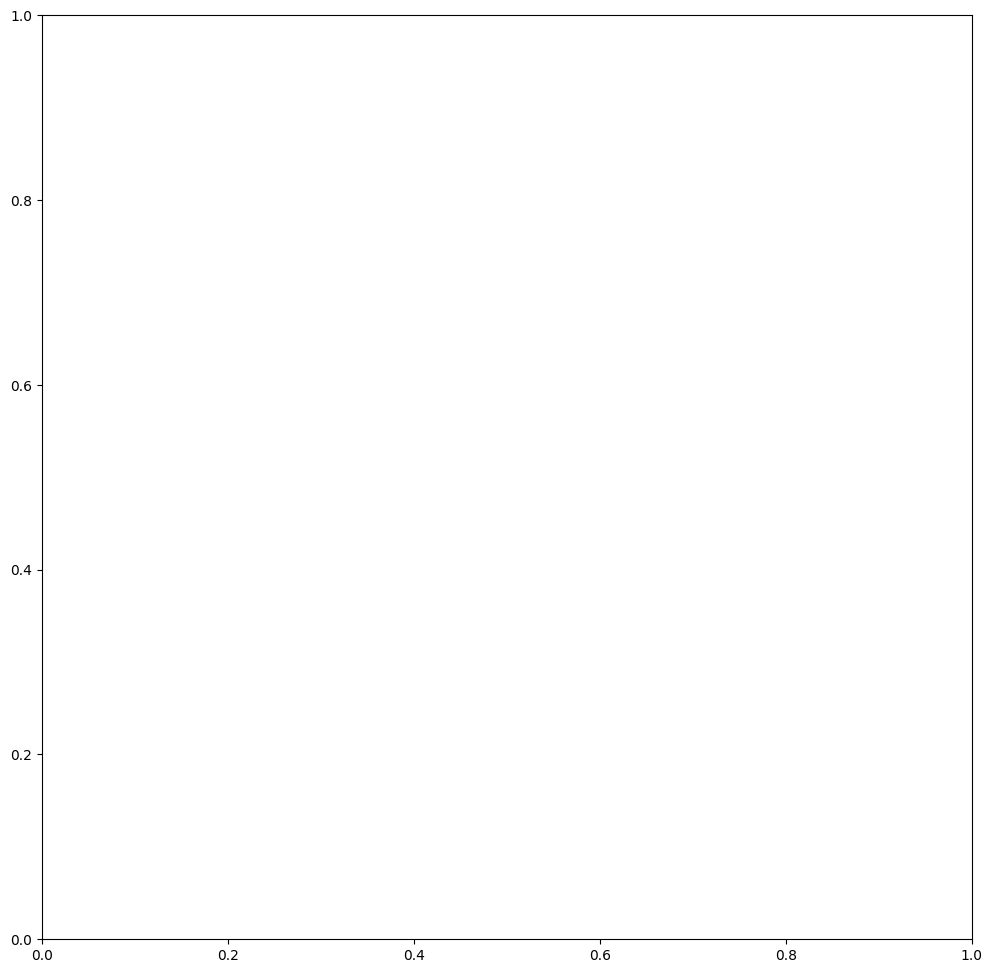

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

In [34]:
hb = ax.hexbin(
    x=gdf.geometry.x,
    y=gdf.geometry.y,
    C=gdf['price'],
    reduce_C_function=np.mean, # Calculate the mean price in each bin
    gridsize=40,              # Number of bins in x-direction
    cmap='jet',
    mincnt=1,                 # Only plot bins with at least 1 listing
    vmax=1000                 # Cap the maximum price for better visualization
)

In [40]:
hb

In [35]:
cb = fig.colorbar(hb, ax=ax)
cb.set_label('Average Price (USD)')

# Set map title and labels
ax.set_title('Ho Chi Minh City Airbnb - Average Price by Hexagonal Bin', fontsize=16)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Set tight layout to prevent labels from being cut off
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

In [38]:
plt.show()

In [39]:
plt.savefig('average_price_map.png')

<Figure size 640x480 with 0 Axes>